# Descriptive statistics - Leaf Area Index (LAI) Maps

- Project:     cercospoRa
- Script:      03_desc_stats_lai_cercospoRa.ipynb
- Author:      Rene Heim
- Affiliation: University of Goettingen
- Date:        2025-11-22

**Objective:** This notebook provides descriptive statistics of leaf area index (LAI) maps to understand the distribution and characteristics of LAI values. 

**Data:** LAI maps were generated using PROSAIL, a radiative transfer model that was applied on multispectral imagery from uncrewed aerial systems (UAS) and satellite (S2). 

**Methods:** This notebook will explore the following aspects of the LAI maps:

* Distribution of LAI values
* Summary statistics (e.g., mean, median, standard deviation)

**Notebook Structure:** This notebook is organized into the following sections:

1. Data Import and Preparation
2. Descriptive Statistics

### 1. Set up environment

**Note:** For reproducible installation of dependencies using `%conda install`, please open this notebook in Jupyter Notebook or JupyterLab. Magic commands may not function as expected in other Python environments or editors.

In [6]:
#%conda install numpy pandas geopandas rasterio rioxarray shapely matplotlib seaborn session-info2

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import geopandas as gpd
import rioxarray as rxr
from shapely.geometry import Point
import pandas as pd
import datetime as dt
from session_info2 import session_info
session_info(dependencies=True)

C:\Users\heim8\AppData\Local\Temp\ipykernel_28316\1598135682.py:12: RuntimeWarning: Failed to import dependencies for application/vnd.jupyter.widget-view+json representation. (ModuleNotFoundError: No module named 'ipywidgets')
  session_info(dependencies=True)


Package,Version
seaborn,0.13.2
matplotlib,3.10.6
numpy,2.3.3
geopandas,1.1.1
rioxarray,0.19.0
shapely,2.1.2
pandas,2.3.2
Component,Info
Python,"3.13.7 | packaged by Anaconda, Inc. | (main, Sep 9 2025, 19:54:37) [MSC v.1929 64 bit (AMD64)]"
OS,Windows-11-10.0.26100-SP0


In [2]:
os.chdir(r'C:\Users\heim8\ownCloud\01_projects\cercospoRa_share')
current_date = dt.date.today()
out = r"C:\Users\heim8\ownCloud\01_projects\cercospoRa_share\output"

### 2. Import raster and vector data

In [4]:
treated_ino = r"reproducibility_raw_data\20250504_treated_ino.gpkg"
untreated_ino = r"reproducibility_raw_data\20250504_untreated_ino.gpkg"

treated_roi = r"reproducibility_raw_data\20250504_treated_roi_diff.gpkg"
untreated_roi = r"reproducibility_raw_data\20250504_untreated_roi_diff.gpkg"

# UAS
lai_uas_1 = r"output\LAI_maps\UAV\2022_06_14.tif"
lai_uas_2 = r"output\LAI_maps\UAV\2022_06_28.tif"
# Sentinel 2
lai_s2_1 = r"output\LAI_maps\S2\2022_06_10.tif"
lai_s2_2 = r"output\LAI_maps\S2\2022_06_30.tif"
# Sentinel 2 Superresolution (https://medium.com/@ya_71389/sentinel-2-deep-resolution-3-0-c71a601a2253)
lai_s2s_1 = r"output/LAI_maps/S2_superresolution/2022_06_10.tif"
lai_s2s_2 = r"output/LAI_maps/S2_superresolution/2022_06_30.tif"

# Load the polygon layers
treated_ino = gpd.read_file(treated_ino)
untreated_ino = gpd.read_file(untreated_ino)

treated_roi = gpd.read_file(treated_roi)
untreated_roi = gpd.read_file(untreated_roi)

uas_1 = rxr.open_rasterio(lai_uas_1)
uas_2 = rxr.open_rasterio(lai_uas_2)

s2_1 = rxr.open_rasterio(lai_s2_1)
s2_2 = rxr.open_rasterio(lai_s2_1)

s2s_1 = rxr.open_rasterio(lai_s2s_1)
s2s_2 = rxr.open_rasterio(lai_s2s_1)

print(f"⚠️ S2 early lai raster CRS: {s2_1.rio.crs}")
print(f"⚠️ S2 later lai raster CRS: {s2_2.rio.crs}")

print(f"⚠️ S2S early lai raster CRS: {s2s_1.rio.crs}")
print(f"⚠️ S2S later lai raster CRS: {s2s_2.rio.crs}")

print(f"⚠️ UAS early lai raster CRS: {uas_1.rio.crs}")
print(f"⚠️ UAS later lai raster CRS: {uas_2.rio.crs}")

⚠️ S2 early lai raster CRS: EPSG:32632
⚠️ S2 later lai raster CRS: EPSG:32632
⚠️ S2S early lai raster CRS: EPSG:32632
⚠️ S2S later lai raster CRS: EPSG:32632
⚠️ UAS early lai raster CRS: EPSG:4326
⚠️ UAS later lai raster CRS: EPSG:4326


### 3. Reproject CRS

In [5]:
uas_1_rp = uas_1.rio.reproject("EPSG:32632")
uas_2_rp = uas_2.rio.reproject("EPSG:32632")

print(f"⚠️ UAS 1 reprojected raster CRS: {uas_1_rp.rio.crs}")
print(f"⚠️ UAS 2 reprojected raster CRS: {uas_2_rp.rio.crs}")

⚠️ UAS 1 reprojected raster CRS: EPSG:32632
⚠️ UAS 2 reprojected raster CRS: EPSG:32632


In [6]:
treated_ino = treated_ino.to_crs(32632)
untreated_ino = untreated_ino.to_crs(32632)

treated_roi = treated_roi.to_crs(32632)
untreated_roi = untreated_roi.to_crs(32632)

print(f"⚠️ Treated inoculation area CRS: {treated_ino.crs}")
print(f"⚠️ Unreated inoculation area CRS: {untreated_ino.crs}")

print(f"⚠️ Treated non-inoculated area CRS: {treated_roi.crs}")
print(f"⚠️ Untreated non-inoculated area CRS: {untreated_roi.crs}")

⚠️ Treated inoculation area CRS: EPSG:32632
⚠️ Unreated inoculation area CRS: EPSG:32632
⚠️ Treated non-inoculated area CRS: EPSG:32632
⚠️ Untreated non-inoculated area CRS: EPSG:32632


### 4. Handle no data values

In [7]:
print(f"⚠️ UAS 1 no data value is: {uas_1_rp.rio.nodata}")
print(f"⚠️ UAS 2 no data value is: {uas_2_rp.rio.nodata}")

print(f"⚠️ S2 1 no data value is: {s2_1.rio.nodata}")
print(f"⚠️ S2 2 no data value is: {s2_2.rio.nodata}")

print(f"⚠️ S2S 1 no data value is: {s2s_1.rio.nodata}")
print(f"⚠️ S2S 2 no data value is: {s2s_2.rio.nodata}")

⚠️ UAS 1 no data value is: nan
⚠️ UAS 2 no data value is: nan
⚠️ S2 1 no data value is: nan
⚠️ S2 2 no data value is: nan
⚠️ S2S 1 no data value is: nan
⚠️ S2S 2 no data value is: nan


In [8]:
s2_1 = s2_1.where(s2_1 >= 0)
s2_1.rio.write_nodata(np.nan, inplace=True)

s2_2 = s2_2.where(s2_2 >= 0)
s2_2.rio.write_nodata(np.nan, inplace=True)

print(f"⚠️ S2 1 no data value is: {s2_1.rio.nodata}")
print(f"⚠️ S2 2 no data value is: {s2_2.rio.nodata}")

⚠️ S2 1 no data value is: nan
⚠️ S2 2 no data value is: nan


### 4. Verify location of vector layers

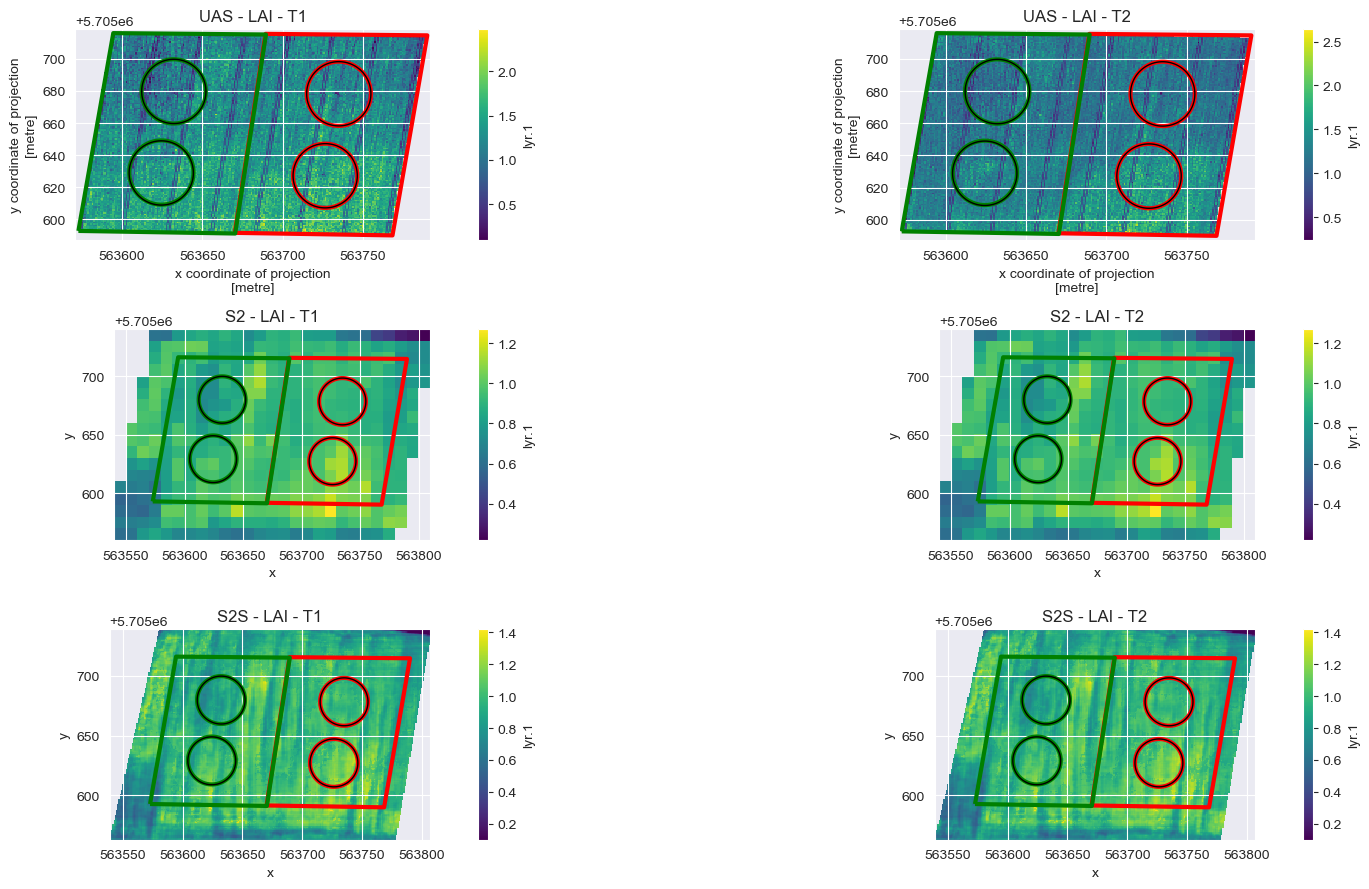

In [9]:
# Create a figure with a 2x3 subplot grid
fig = plt.figure(figsize=(18, 9))

# Create a gridspec with 2 columns and 3 rows
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1])

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])


# UAS - LAI - T1
uas_1_rp.isel(band=0).plot.imshow(ax=ax1, cmap="viridis")
treated_roi.boundary.plot(ax=ax1, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax1, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax1, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax1, edgecolor='black', linewidth=1)

ax1.set_title("UAS - LAI - T1")

# UAS - LAI - T1
uas_2_rp.isel(band=0).plot.imshow(ax=ax2, cmap="viridis")
treated_roi.boundary.plot(ax=ax2, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax2, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax2, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax2, edgecolor='black', linewidth=1)

ax2.set_title("UAS - LAI - T2")

# S2 - LAI - T1
s2_1.isel(band=0).plot.imshow(ax=ax3, cmap="viridis")
treated_roi.boundary.plot(ax=ax3, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax3, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax3, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax3, edgecolor='black', linewidth=1)

ax3.set_title("S2 - LAI - T1")

# S2 - LAI - T2
s2_2.isel(band=0).plot.imshow(ax=ax4, cmap="viridis")
treated_roi.boundary.plot(ax=ax4, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax4, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax4, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax4, edgecolor='black', linewidth=1)

ax4.set_title("S2 - LAI - T2")

# S2S - LAI - T1
s2s_1.isel(band=0).plot.imshow(ax=ax5, cmap="viridis")
treated_roi.boundary.plot(ax=ax5, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax5, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax5, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax5, edgecolor='black', linewidth=1)

ax5.set_title("S2S - LAI - T1")

# S2S - LAI - T2
s2s_2.isel(band=0).plot.imshow(ax=ax6, cmap="viridis")
treated_roi.boundary.plot(ax=ax6, edgecolor='red', linewidth=3)
untreated_roi.boundary.plot(ax=ax6, edgecolor='green', linewidth=3)

treated_ino.boundary.plot(ax=ax6, edgecolor='black', linewidth=1)
untreated_ino.boundary.plot(ax=ax6, edgecolor='black', linewidth=1)

ax6.set_title("S2S - LAI - T2")
# Layout so plots do not overlap
fig.tight_layout()
plt.savefig(os.path.join(out, f"{current_date}_plot_vectorcheck_lai.png"), dpi=600, bbox_inches='tight')
plt.show()

### 5. Extract UAS-derived LAI values

In [10]:
def extract_raster_data(uas_1_rp, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="df_", value_column="values"):
    extractions = [
        (treated_roi,    "treated",   "non-inoculated"),
        (untreated_roi,  "untreated", "non-inoculated"),
        (treated_ino,    "treated",   "inoculated"),
        (untreated_ino,  "untreated", "inoculated")
    ]

    dfs = []

    for poly, treatment, region in extractions:
        clipped = uas_1_rp.rio.clip(poly.geometry, poly.crs, drop=True).isel(band=0)
        values = clipped.values.flatten()
        mask = ~np.isnan(values)
        values = values[mask]

        y_coords, x_coords = np.meshgrid(clipped['y'].values, clipped['x'].values, indexing='ij')
        x_flat = x_coords.flatten()[mask]
        y_flat = y_coords.flatten()[mask]

        df = pd.DataFrame({
            "x": x_flat,
            "y": y_flat,
            value_column: values,
            "treatment": treatment,
            "area": region,
            "source": df_name
        })

        dfs.append(df)

    df = pd.concat(dfs, ignore_index=True)
    return df

In [11]:
df_uas_1 = extract_raster_data(uas_1_rp, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="uas_t1", value_column="lai")
df_uas_1

,x,y,lai,treatment,area,source
0,563689.972760,5.705715e+06,1.26,treated,non-inoculated,uas_t1
1,563690.929995,5.705715e+06,0.95,treated,non-inoculated,uas_t1
2,563691.887231,5.705715e+06,0.89,treated,non-inoculated,uas_t1
3,563692.844466,5.705715e+06,1.44,treated,non-inoculated,uas_t1
4,563693.801702,5.705715e+06,1.34,treated,non-inoculated,uas_t1
...,...,...,...,...,...,...
26198,563625.837982,5.705610e+06,1.52,untreated,inoculated,uas_t1
26199,563626.795217,5.705610e+06,1.31,untreated,inoculated,uas_t1
26200,563627.752453,5.705610e+06,1.49,untreated,inoculated,uas_t1
26201,563628.709688,5.705610e+06,1.23,untreated,inoculated,uas_t1


In [12]:
df_uas_2 = extract_raster_data(uas_2_rp, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="uas_t2", value_column="lai")
df_uas_2

,x,y,lai,treatment,area,source
0,563689.452429,5.705715e+06,1.20,treated,non-inoculated,uas_t2
1,563690.429017,5.705715e+06,0.98,treated,non-inoculated,uas_t2
2,563689.452429,5.705714e+06,1.01,treated,non-inoculated,uas_t2
3,563690.429017,5.705714e+06,1.01,treated,non-inoculated,uas_t2
4,563691.405606,5.705714e+06,1.08,treated,non-inoculated,uas_t2
...,...,...,...,...,...,...
25092,563624.997596,5.705609e+06,1.19,untreated,inoculated,uas_t2
25093,563625.974184,5.705609e+06,1.40,untreated,inoculated,uas_t2
25094,563626.950773,5.705609e+06,1.19,untreated,inoculated,uas_t2
25095,563627.927361,5.705609e+06,1.23,untreated,inoculated,uas_t2


### 6. Extract S2-derived LAI values

In [13]:
df_s2_1 = extract_raster_data(s2_1, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="s2_t1", value_column="lai")
df_s2_1

,x,y,lai,treatment,area,source
0,563695.0,5705715.0,0.99,treated,non-inoculated,s2_t1
1,563705.0,5705715.0,0.90,treated,non-inoculated,s2_t1
2,563715.0,5705715.0,0.96,treated,non-inoculated,s2_t1
3,563725.0,5705715.0,0.96,treated,non-inoculated,s2_t1
4,563735.0,5705715.0,0.90,treated,non-inoculated,s2_t1
...,...,...,...,...,...,...
246,563625.0,5705625.0,1.01,untreated,inoculated,s2_t1
247,563635.0,5705625.0,0.92,untreated,inoculated,s2_t1
248,563615.0,5705615.0,0.96,untreated,inoculated,s2_t1
249,563625.0,5705615.0,0.97,untreated,inoculated,s2_t1


In [14]:
df_s2_2 = extract_raster_data(s2_2, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="s2_t2", value_column="lai")
df_s2_2

,x,y,lai,treatment,area,source
0,563695.0,5705715.0,0.99,treated,non-inoculated,s2_t2
1,563705.0,5705715.0,0.90,treated,non-inoculated,s2_t2
2,563715.0,5705715.0,0.96,treated,non-inoculated,s2_t2
3,563725.0,5705715.0,0.96,treated,non-inoculated,s2_t2
4,563735.0,5705715.0,0.90,treated,non-inoculated,s2_t2
...,...,...,...,...,...,...
246,563625.0,5705625.0,1.01,untreated,inoculated,s2_t2
247,563635.0,5705625.0,0.92,untreated,inoculated,s2_t2
248,563615.0,5705615.0,0.96,untreated,inoculated,s2_t2
249,563625.0,5705615.0,0.97,untreated,inoculated,s2_t2


### 7. Extract S2S-derived LAI values

In [15]:
df_s2s_1 = extract_raster_data(s2s_1, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="s2s_t1", value_column="lai")
df_s2s_1

,x,y,lai,treatment,area,source
0,563689.5,5705715.5,0.85,treated,non-inoculated,s2s_t1
1,563690.5,5705715.5,0.86,treated,non-inoculated,s2s_t1
2,563691.5,5705715.5,0.87,treated,non-inoculated,s2s_t1
3,563692.5,5705715.5,0.90,treated,non-inoculated,s2s_t1
4,563693.5,5705715.5,0.95,treated,non-inoculated,s2s_t1
...,...,...,...,...,...,...
24306,563624.5,5705609.5,1.16,untreated,inoculated,s2s_t1
24307,563625.5,5705609.5,1.07,untreated,inoculated,s2s_t1
24308,563626.5,5705609.5,1.08,untreated,inoculated,s2s_t1
24309,563627.5,5705609.5,0.97,untreated,inoculated,s2s_t1


In [16]:
df_s2s_2 = extract_raster_data(s2s_2, treated_roi, untreated_roi, treated_ino, untreated_ino, df_name="s2s_t2", value_column="lai")
df_s2s_2

,x,y,lai,treatment,area,source
0,563689.5,5705715.5,0.85,treated,non-inoculated,s2s_t2
1,563690.5,5705715.5,0.86,treated,non-inoculated,s2s_t2
2,563691.5,5705715.5,0.87,treated,non-inoculated,s2s_t2
3,563692.5,5705715.5,0.90,treated,non-inoculated,s2s_t2
4,563693.5,5705715.5,0.95,treated,non-inoculated,s2s_t2
...,...,...,...,...,...,...
24306,563624.5,5705609.5,1.16,untreated,inoculated,s2s_t2
24307,563625.5,5705609.5,1.07,untreated,inoculated,s2s_t2
24308,563626.5,5705609.5,1.08,untreated,inoculated,s2s_t2
24309,563627.5,5705609.5,0.97,untreated,inoculated,s2s_t2


### 8. Concatenate and clean dataframes

In [17]:
# Concatenate the individual DataFrames (df_s2_prediction, df_uav_prediction, etc.)
df_all = pd.concat([df_uas_1, df_uas_2, df_s2_1, df_s2_2, df_s2s_1, df_s2s_2], ignore_index=True)

df_all.to_csv(os.path.join(out, f"{current_date}_fulldf_lai_cercospoRa.csv"), index=False)

df_untreated = df_all[df_all["treatment"] == "untreated"]

# Drop any rows where 'source' is missing (optional)
df_untreated = df_untreated .dropna(subset=['source'])

# Split the source column at the underscore
df_untreated [['platform', 'time']] = df_untreated ['source'].str.split('_', expand=True)

# Show the resulting DataFrame
df_untreated

,x,y,lai,treatment,area,source,platform,time
10517,563599.035388,5.705715e+06,0.89,untreated,non-inoculated,uas_t1,uas,t1
10518,563599.992623,5.705715e+06,0.80,untreated,non-inoculated,uas_t1,uas,t1
10519,563600.949859,5.705715e+06,1.40,untreated,non-inoculated,uas_t1,uas,t1
10520,563601.907094,5.705715e+06,0.90,untreated,non-inoculated,uas_t1,uas,t1
10521,563602.864330,5.705715e+06,1.14,untreated,non-inoculated,uas_t1,uas,t1
...,...,...,...,...,...,...,...,...
100419,563624.500000,5.705610e+06,1.16,untreated,inoculated,s2s_t2,s2s,t2
100420,563625.500000,5.705610e+06,1.07,untreated,inoculated,s2s_t2,s2s,t2
100421,563626.500000,5.705610e+06,1.08,untreated,inoculated,s2s_t2,s2s,t2
100422,563627.500000,5.705610e+06,0.97,untreated,inoculated,s2s_t2,s2s,t2


### 9. Summarize LAI (untreated) data

In [18]:
# Group and summarize
summary = df_untreated.groupby(['area', 'source'])['lai'].describe().round(2)

# Optional: reset index for flat table display
summary = summary.reset_index()

# Save the summary to a CSV file
summary.to_csv(os.path.join(out, f"{current_date}_summary_desc_stats_lai_cercospoRa.csv"), index=False)

# Display the summary (optional)
summary

,area,source,count,mean,std,min,25%,50%,75%,max
0,inoculated,s2_t1,27.0,0.86,0.08,0.72,0.82,0.87,0.92,1.01
1,inoculated,s2_t2,27.0,0.86,0.08,0.72,0.82,0.87,0.92,1.01
2,inoculated,s2s_t1,2512.0,0.93,0.11,0.65,0.85,0.94,1.01,1.22
3,inoculated,s2s_t2,2512.0,0.93,0.11,0.65,0.85,0.94,1.01,1.22
4,inoculated,uas_t1,2738.0,1.20,0.33,0.15,0.98,1.23,1.45,2.17
5,inoculated,uas_t2,2640.0,1.19,0.24,0.31,1.04,1.20,1.34,1.94
6,non-inoculated,s2_t1,99.0,0.92,0.09,0.61,0.86,0.91,0.98,1.14
7,non-inoculated,s2_t2,99.0,0.92,0.09,0.61,0.86,0.91,0.98,1.14
8,non-inoculated,s2s_t1,9416.0,0.96,0.12,0.51,0.89,0.97,1.05,1.37
9,non-inoculated,s2s_t2,9416.0,0.96,0.12,0.51,0.89,0.97,1.05,1.37


### 10. Verify position of extracted coordinates

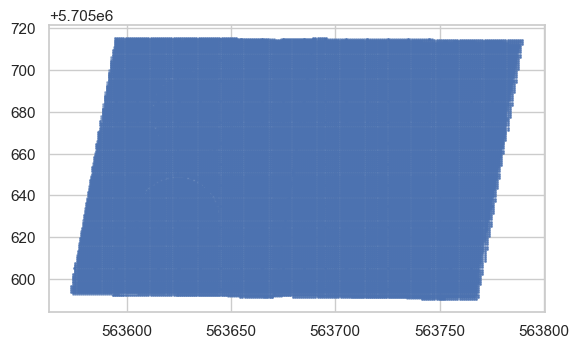

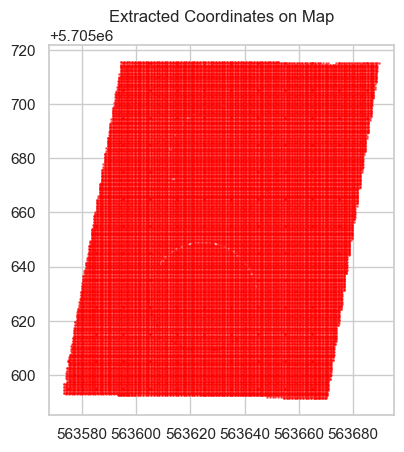

In [50]:
# Create geometry column from x and y
geometry = [Point(xy) for xy in zip(df_all["x"], df_all["y"])]
geometry_un = [Point(xy) for xy in zip(df_untreated["x"], df_untreated["y"])]
gdf = gpd.GeoDataFrame(df_all, geometry=geometry, crs="EPSG:32633")  # Replace with your CRS
gdf_un = gpd.GeoDataFrame(df_untreated, geometry=geometry_un, crs="EPSG:32633")  # Replace with your CRS
# Plot
gdf.plot(markersize=1, alpha=0.5)
gdf_un.plot(markersize=1, alpha=0.5, color="red")
plt.title("Extracted Coordinates on Map")
plt.show()

### 11. Visualize untreated LAI data

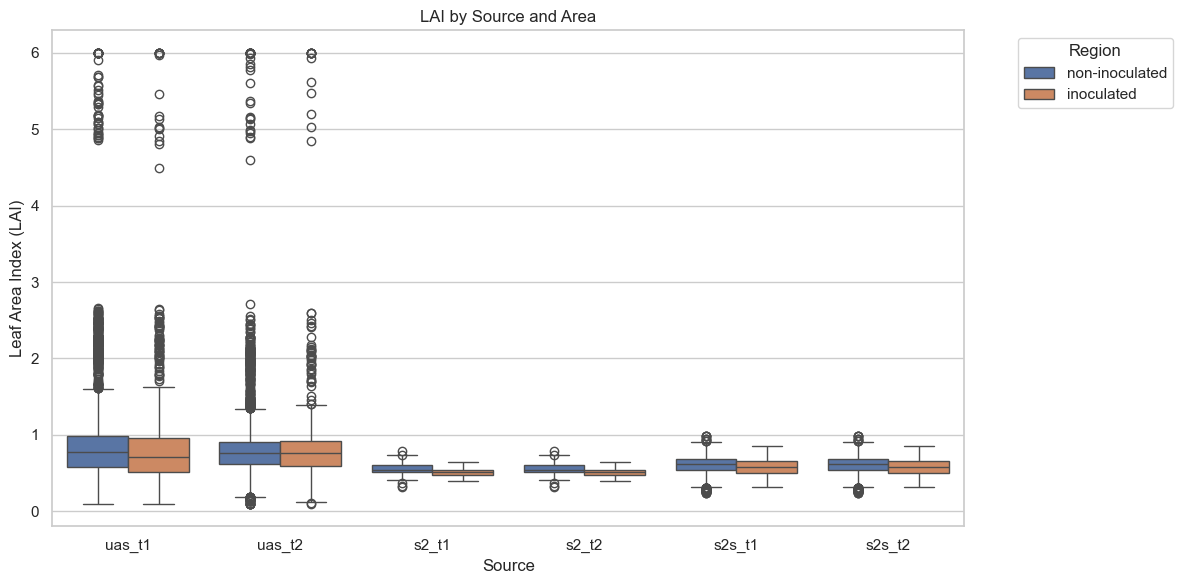

In [51]:
# Set plot style
sns.set(style="whitegrid")

# Create a boxplot of LAI by source and region
plt.figure(figsize=(12, 6))
sns.boxplot(x="source", y="lai", hue="area", data=df_untreated)

# Add titles and labels
plt.title("LAI by Source and Area")
plt.xlabel("Source")
plt.ylabel("Leaf Area Index (LAI)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [19]:
print("Success.")

Success.
